<a href="https://colab.research.google.com/github/vmaria2002/RN-Tensorflow/blob/main/RecunoastereLitere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recunoasterea Litereloe A-J folosind RN

> Problema de clasificare

> e un exercitiu de inceput, pe care l-au facut mii de cercetori :))


---
Vor fi folosite:

* funcțiile de activare, optimizarea Gradientului, batching, rata de învățare, inițializarea ponderilor, acuratețea modelului, oprirea prematură etc




---



Etapele parcurse sunt:
*  schițarea modelului și alegerea funcției de activare;
*  descrierea punctelor de intrare a datelor, variabilelor; precizarea operațiilor specifice folosind sintaxa TensorFlow;
* alegerea optimizărilor corespunzătoare (optimizers);
* împărțirea setului de date în sub-seturi (batch) pentru o instruire mai rapidă;
* inițializarea variabilelor în vederea începerii operației de învățare (learning);  procesul de învățare.

# Introducere

Pentru problema se va folosi **gradient backpropagation.**

```
Se folosesc retele neuronale recurente (folosirea informatiei anterioare, pentru a satisface cerinta/ a raspunde la problemele curente)

Utilizare: ecunoașterea vorbirii, modelarea limbii, traducerea, subtitrărea imaginilor

LSTM (Long Short-Term Memory) - retine informatii pe termen SCURT!!!!!!!!!!!
-->LSTM - utila pt a procesa date secventiale
```




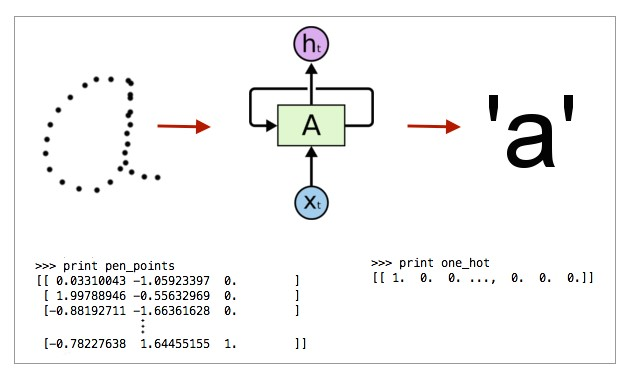

```
 Se poate crea retrea neuronala si pornind de la litera de tipar --> litera de mana
 ```


```
Explicatie- Retea neuronala recurenta:

O imbunatatire, o reprezinta LSTN (e o retea recurenta imbunatatita)
```
E o retea cu bucla

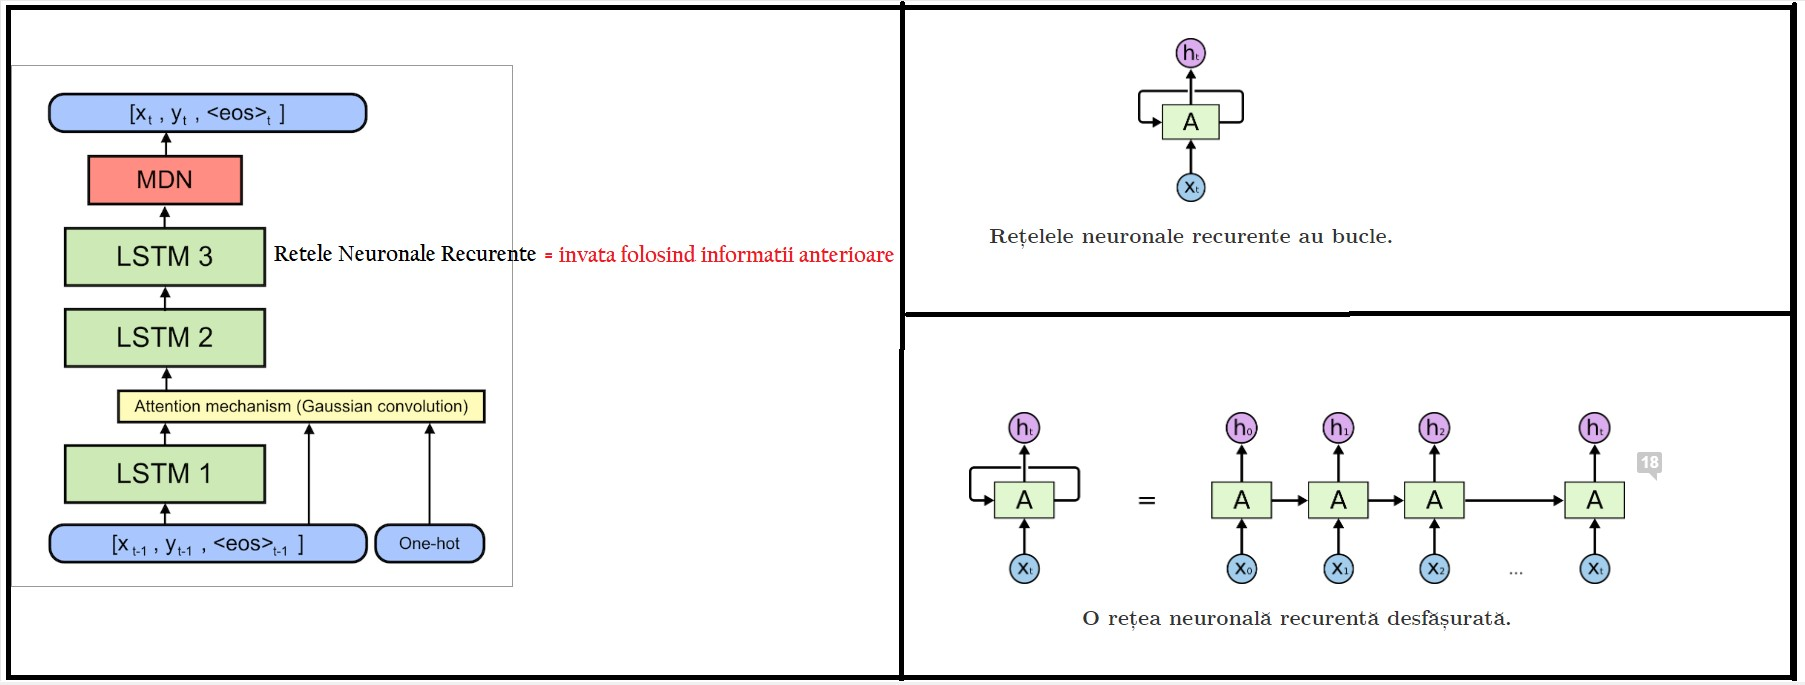

```
Această natură asemănătoare lanțului dezvăluie că rețelele neuronale recurente sunt strâns legate de secvențe și liste.
```


```
LSTM - overview
```

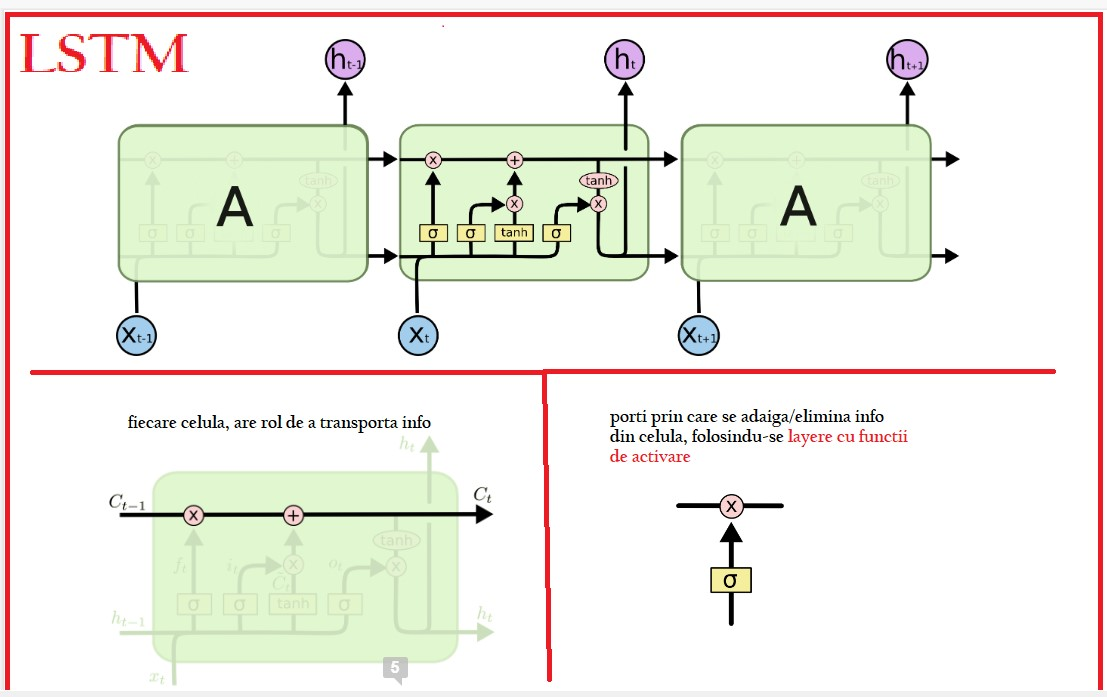



# Straturi din interiorul celulei:


```
Stratul sigmoid: se decide ce informatii se vor elimina din celula
```
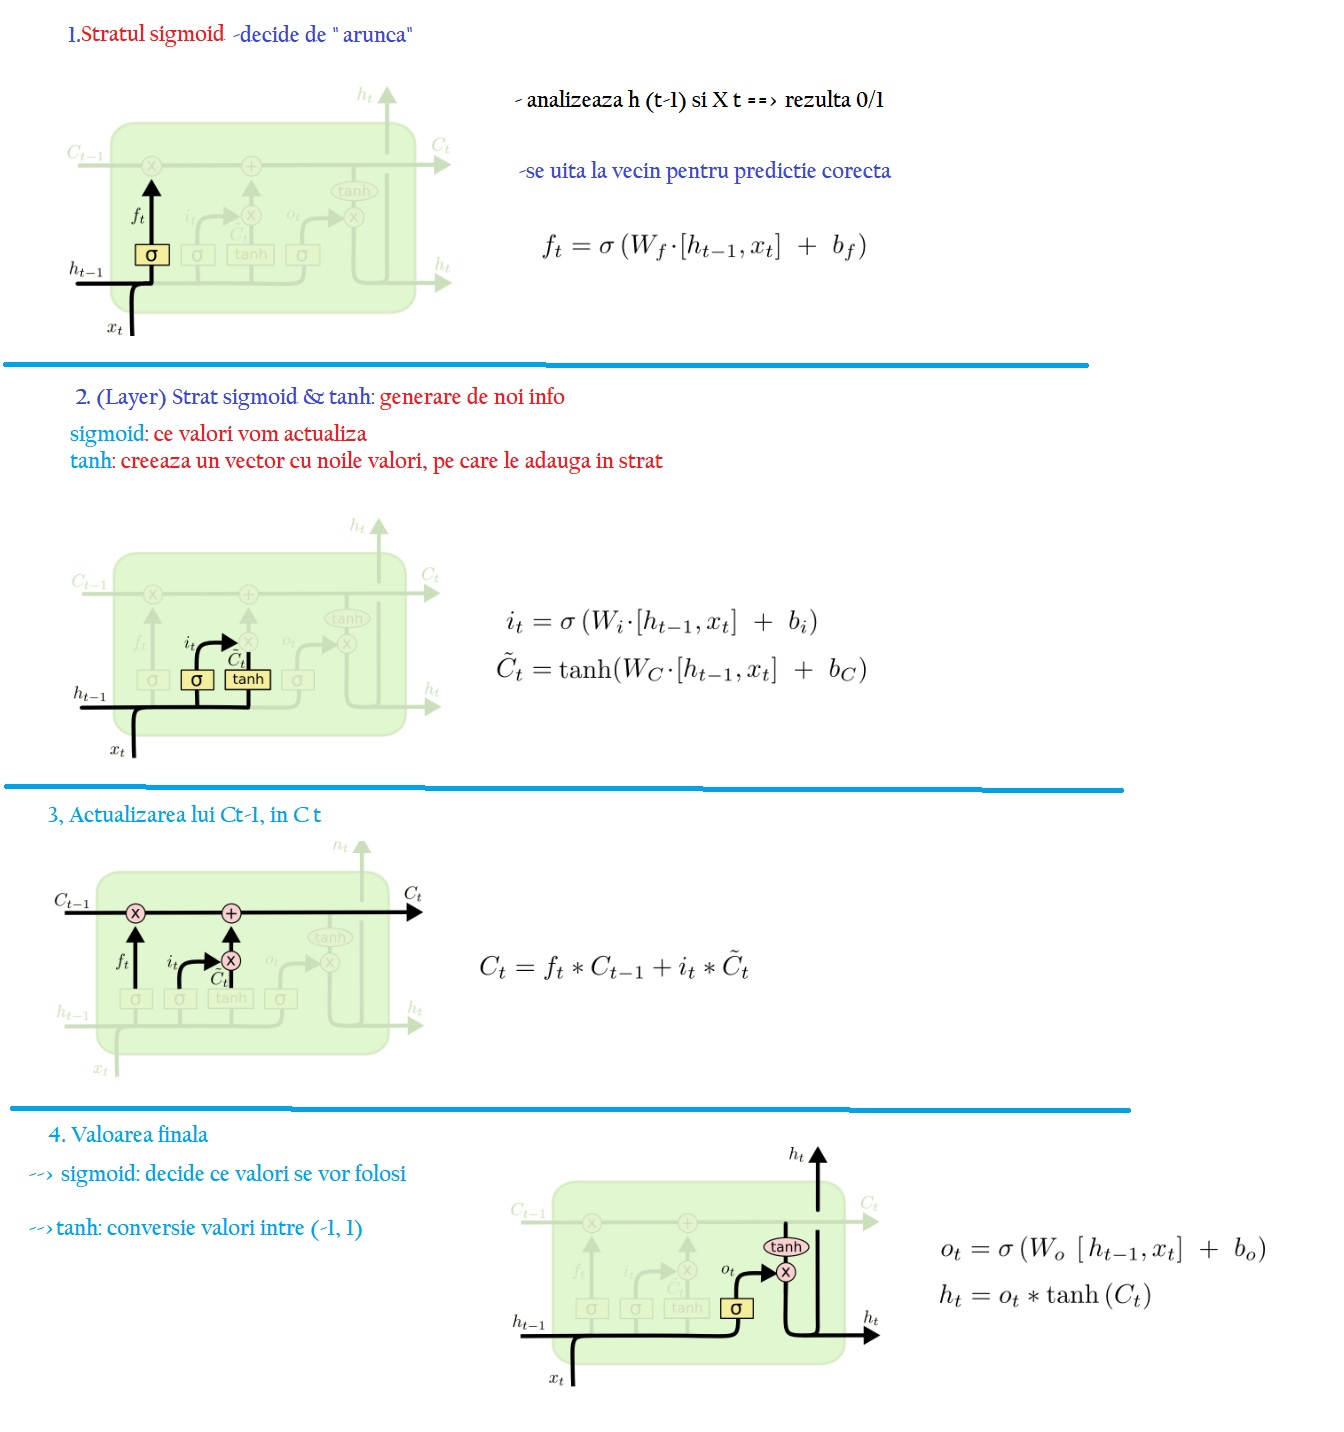

Fiecare LSTM - contine 3 tensor(pt. citire, scriere, stergere)

**MDN:**[Rețeaua de densitate a amestecurilor][ Mixture Density Network]


* masurarea propriei incertitudini
* capteaza cat de aleatorii(dezordonate sunt datele)

De exemplu, MDN-ul va alege gaussian cu forme difuze la începutul liniilor și gaussieni cu forme vârfuri la mijlocul liniilor.


# Mecanismul de atenție
*schimba ferestrele pe masura ce le scrie
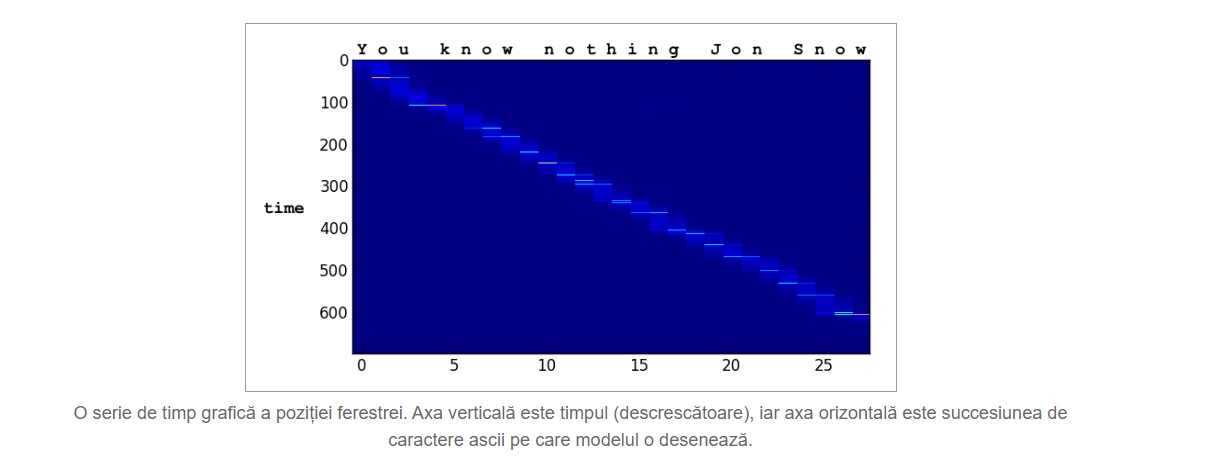

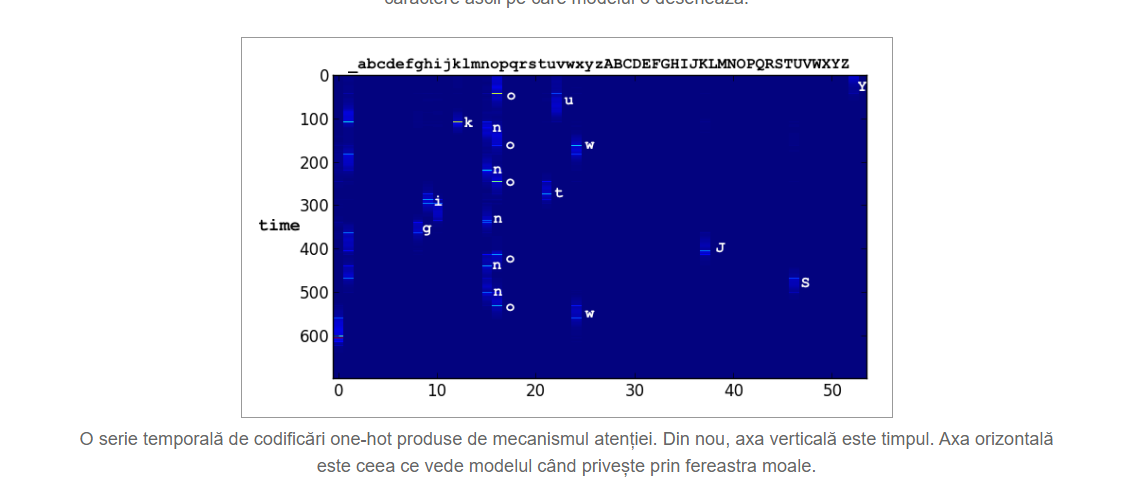

[3] "Funcționează! După câteva ore pe un GPU Tesla K40, modelul generează litere lizibile și după aproximativ o zi scrie propoziții cu doar câteva mici erori."

1. MDN - genereaza aleator litere

2. Mecanismul de atentie-decide ce sa scrie

# Obs
Se foloseste calculul histogramei fiecarei litere:
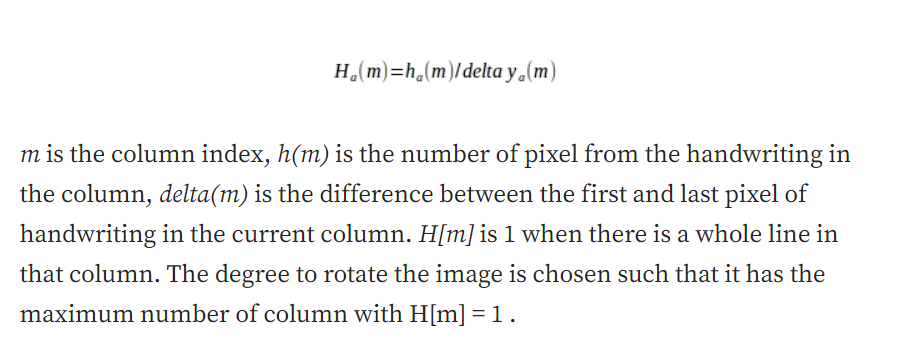

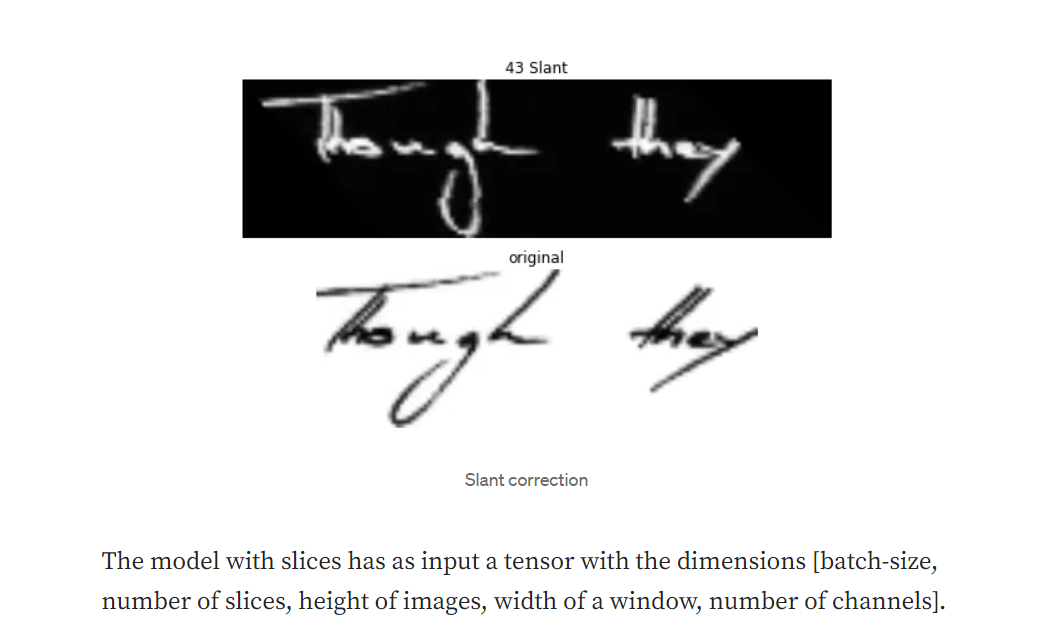

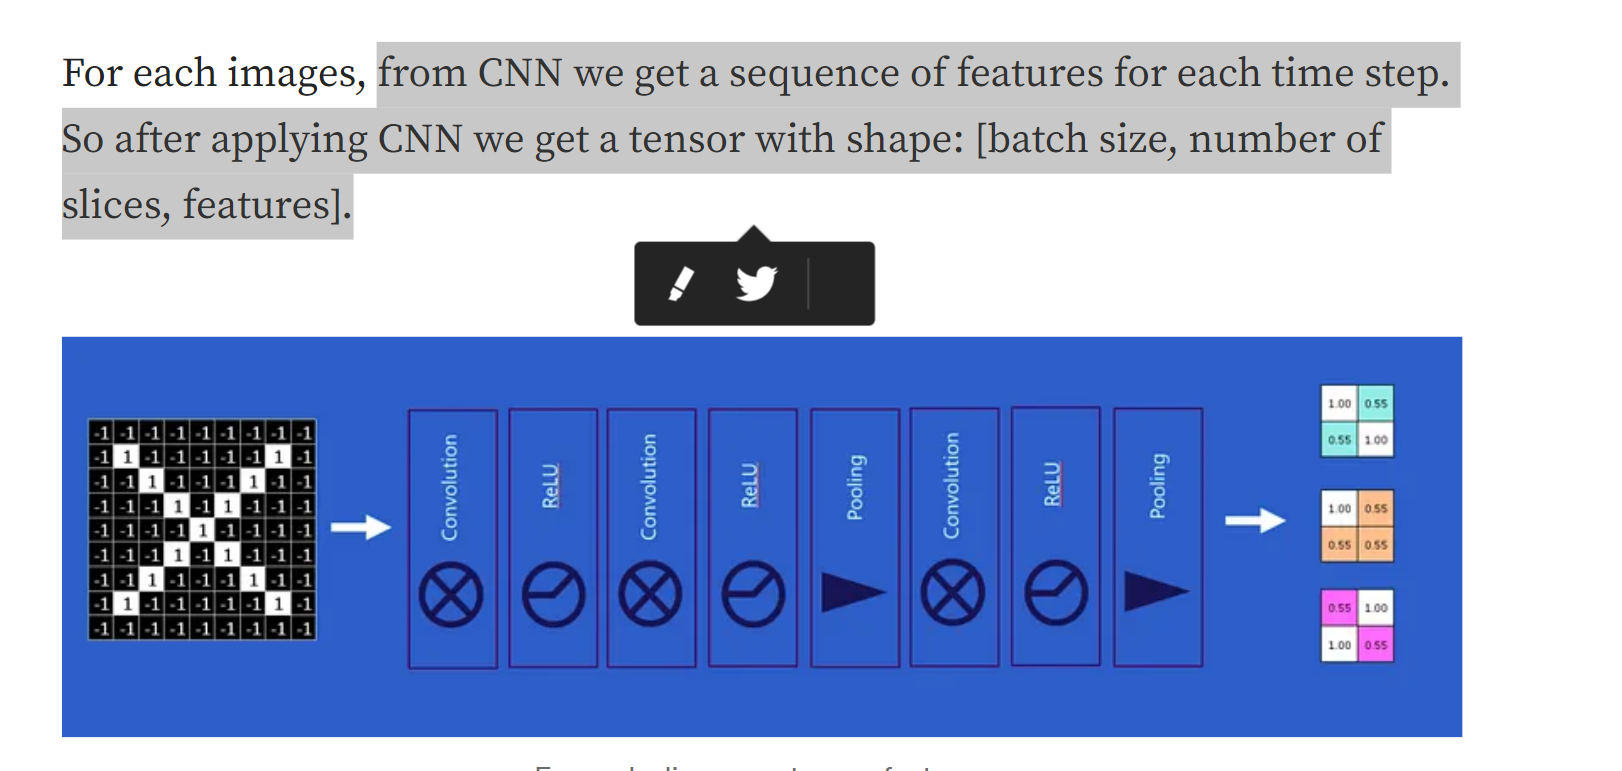

"Now we can use LSTM that is more advanced type of recurrent neural network to get character prediction for each slice."

"After using recurrent neuronal networks we will get a Tensor with shape: [batch size, number of slices, number of characters + blank label]. This has the probability of a character to appear in slice"
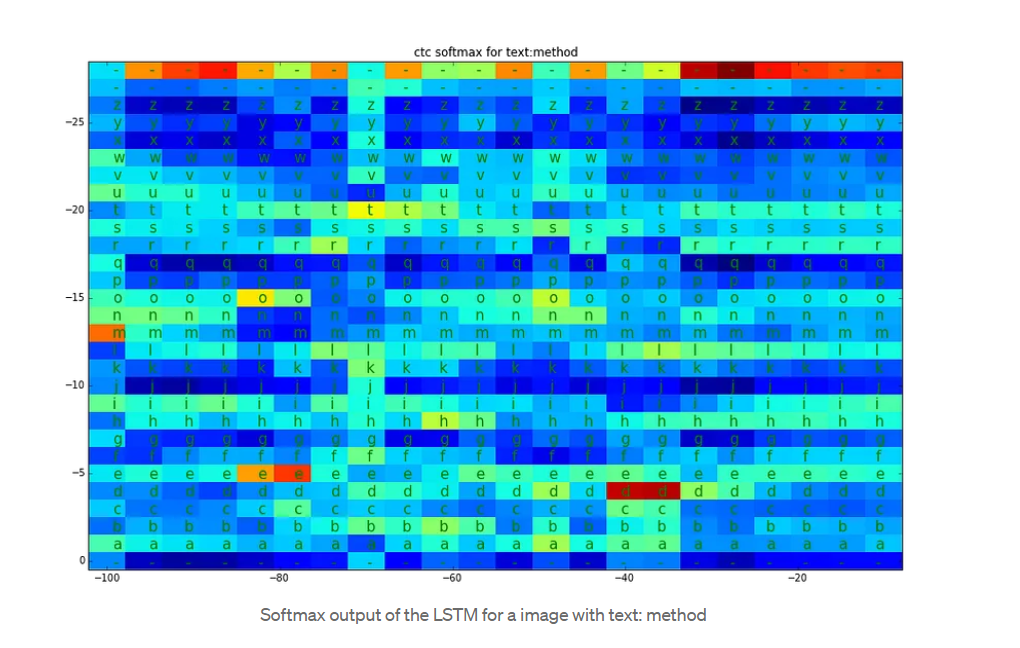

Schimbare dimensiune poze db:
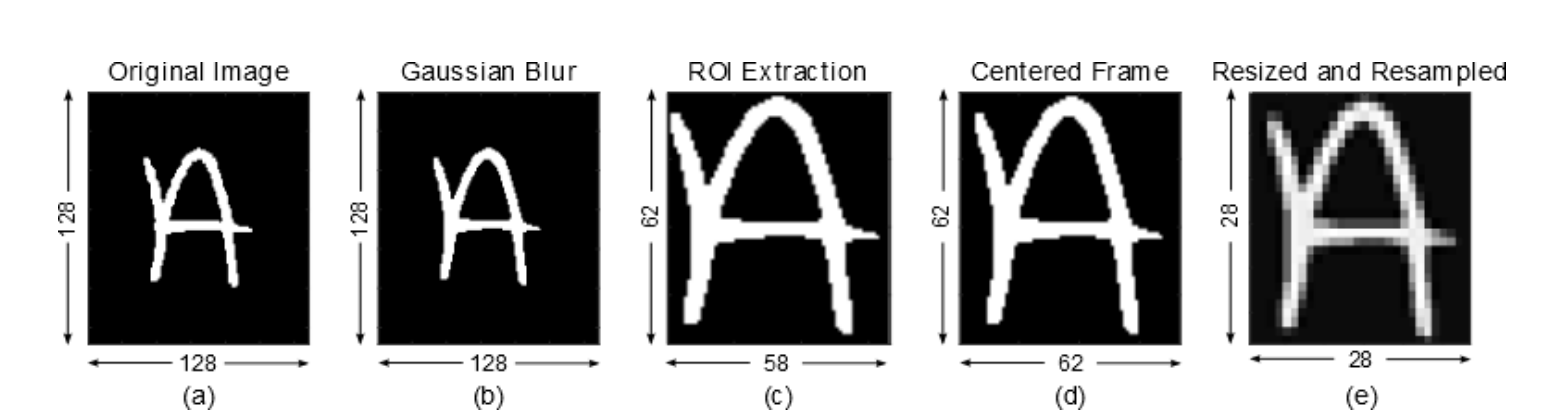

> **Cerinta**

##### [1] "Using tensorflow and neural networks with the example of training a model that is able to recognize digits, I will try to do the same with the first 10 letters of the alphabet (from ”A” to ”J”)."



---

>Info Implementare

---

* imaginea 28x28 => 784 ==>vector de 794 valori
* TRAINING: se face calculand fct. COST: e.g. reduce_sum(TensorFlow)
* ABTRENARE MODEL: GradientDescentOptimizer(TensorFlow)
* impartite in Train si Test



> Implementare

--> se vor prelua imaginile, pentru fiecare imagine, vom adauga intr-un array path-ul si label (tipul de litera)



```
Pentru testare, s-au folosit imagini precum cele din figutra de mai jos, utilizand [7]
```
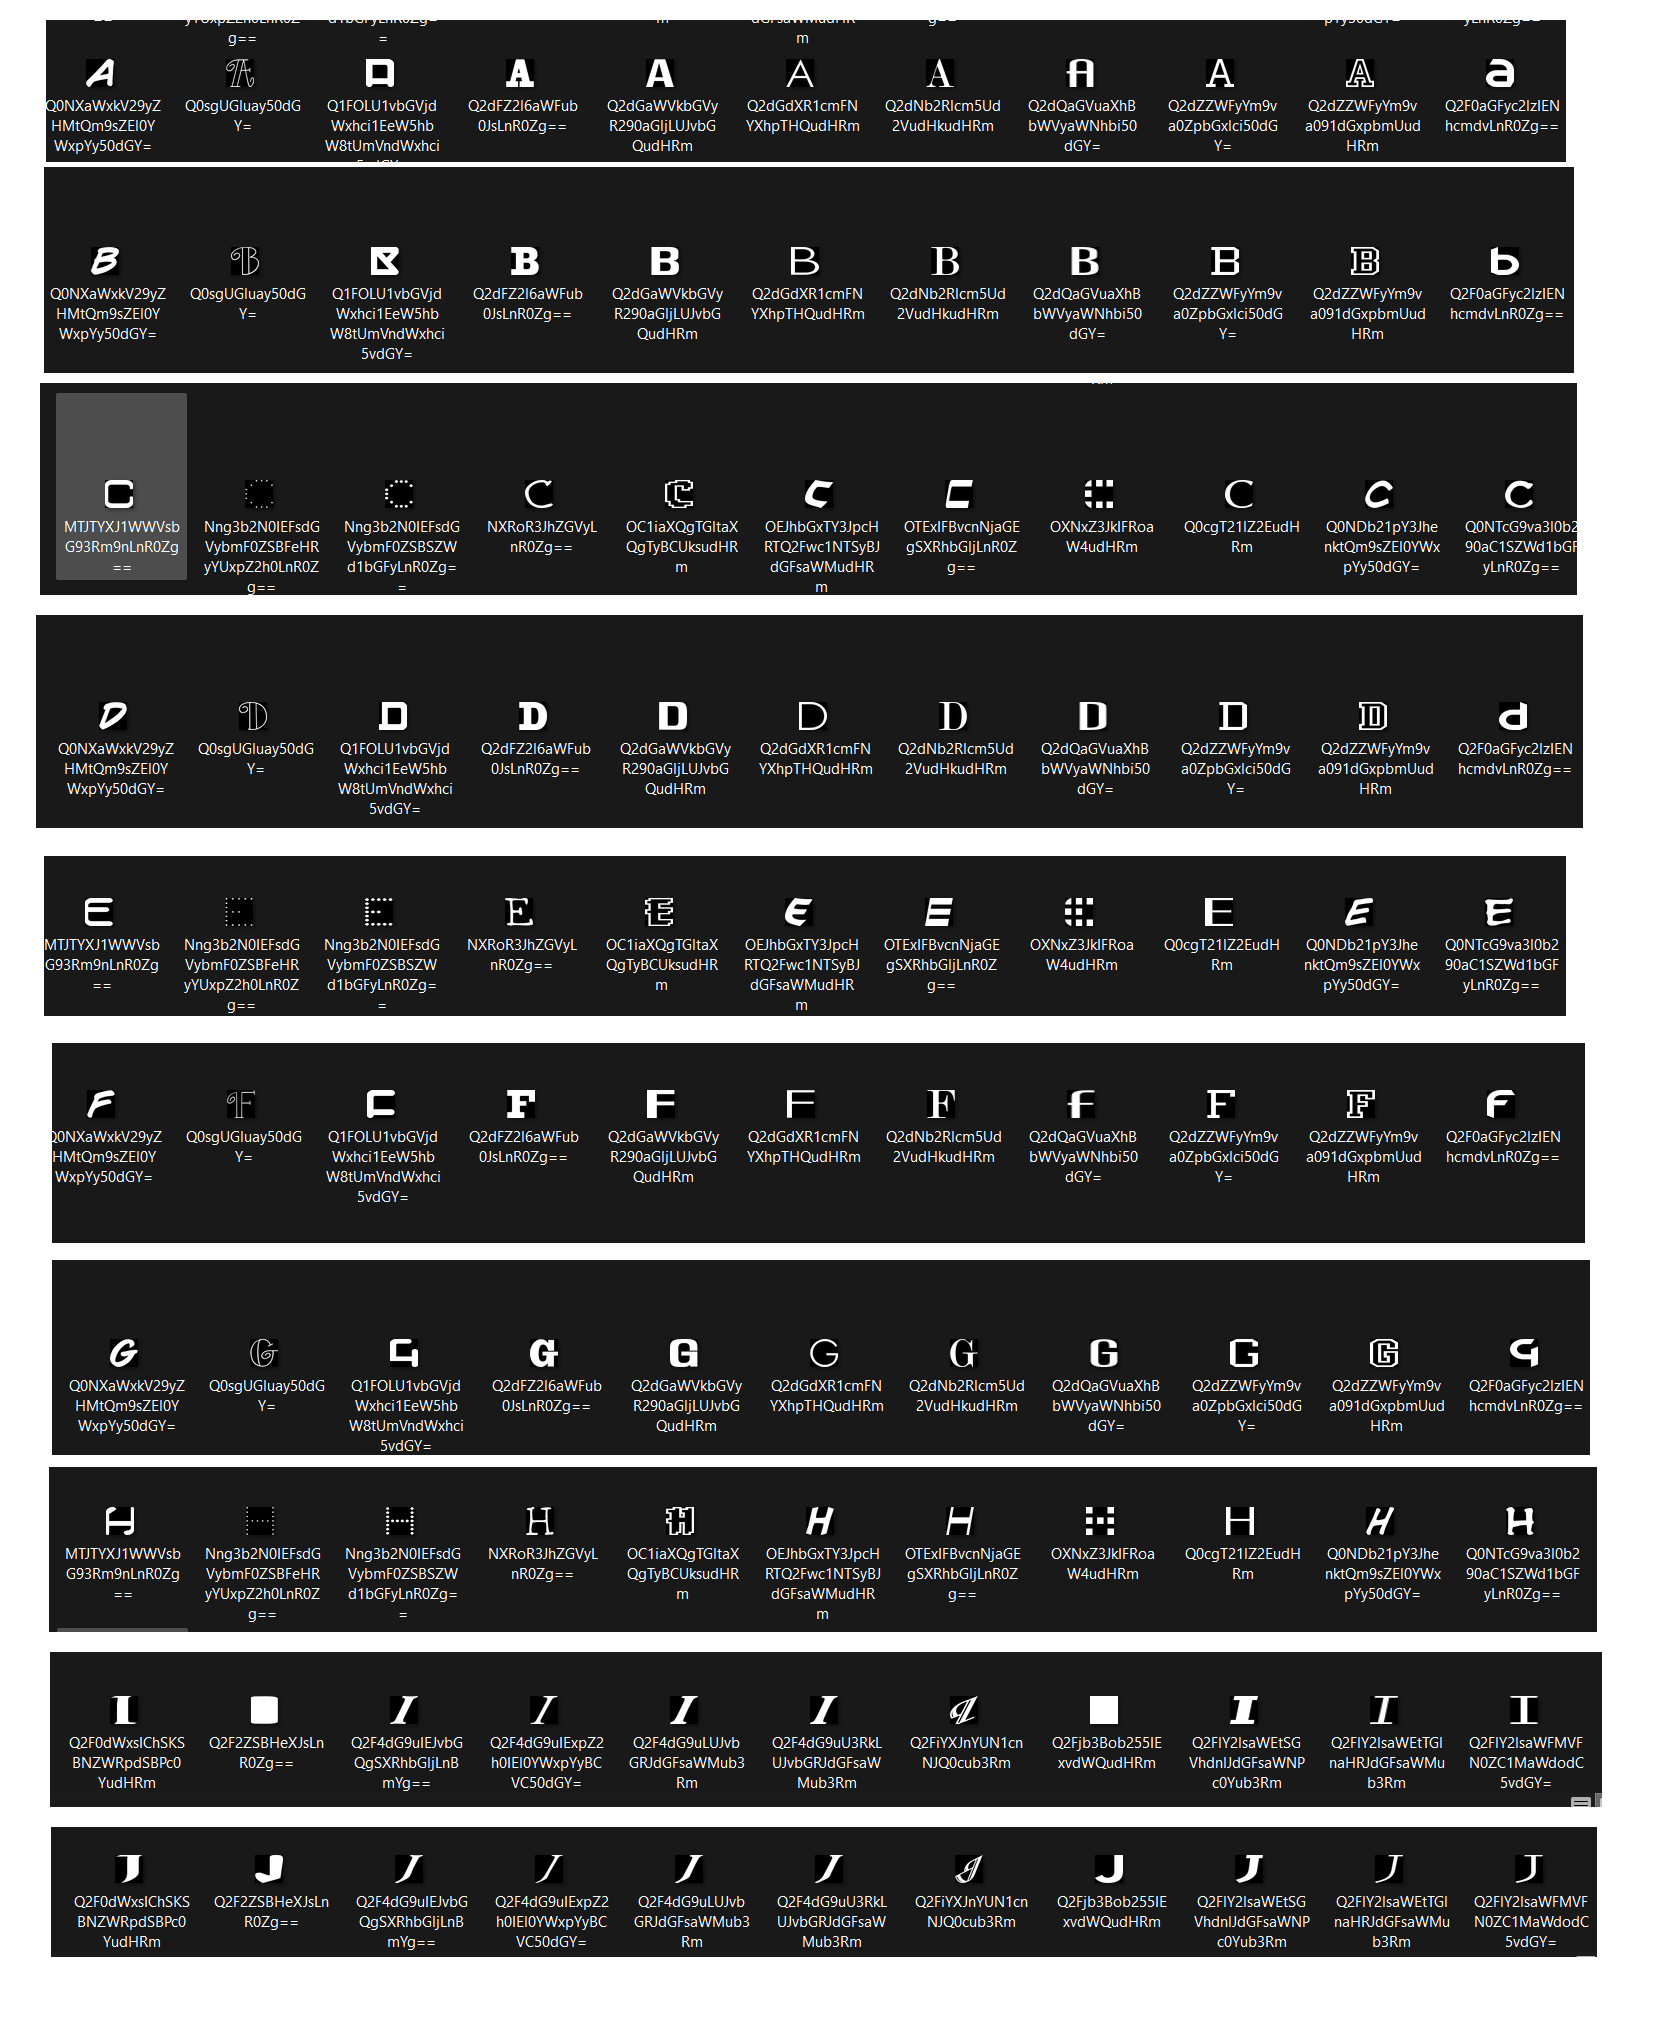

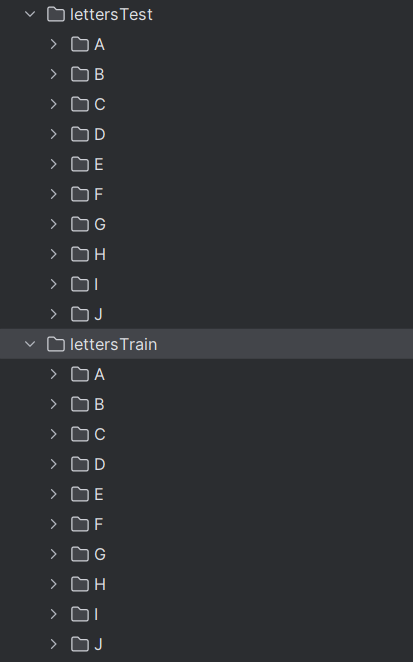

Se vor prelua toate datele din fisiere, [1] dupa citire, vor rezulta 2 vectori(path-ul pana la poza, iar pe pozitia corespunzatoare numele fisierului)

```
getListOfImages(fromFolder): return allImagesArray, allImagesLabelsArray

*  allImagesArray - numele imaginii
*  allImagesLabelsArray - path-ul
```

# Cod citit path poze/ nume poza

In [ ]:
import os
import random

import numpy as np
folders = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
root = "."
trainFolder = "/lettersTrain"
testFolder = "/lettersTest"


In [ ]:
# return nume fisier, path spre poza

def getListOfImages(fromFolder):
    global folders
    global root

    allImagesArray = np.array([], dtype=str)
    allImagesLabelsArray = np.array([], dtype=str)

    for folder in folders:
        print("Loading Image Name of ", folder)
        currentAlphabetFolder = root + fromFolder + "/" + folder
        imagesName = os.listdir(currentAlphabetFolder)
        allImagesArray = np.append(allImagesArray, imagesName)  # append all names of images (feature)
        print("Nr. of images: ", len(imagesName))
        for i in range(0, len(imagesName)):
            allImagesLabelsArray = np.append(allImagesLabelsArray,
                                             currentAlphabetFolder)  # append name of folder to each image (labels)
    return allImagesArray, allImagesLabelsArray


In [ ]:
# afisare info random- citite din preluarea imaginilor din foldere

if __name__ == "__main__":
    allImagesArray, allImagesLabelsArray= getListOfImages("/lettersTrain")
    #printare random:
    r1 = random.randint(0, allImagesArray.size)
    r2 = random.randint(0, allImagesArray.size)

    print(f'nume imagine {allImagesArray[r1]}') #QmFja3RhbGtTZXJpZiBCVE4gU0MgQm9sZE9ibGlxdWUudHRm.png
    print(f'path imagine {allImagesLabelsArray[r2]}') #./lettersTrain/H


# Setul de training

* am ales sa folosim 828 de exemplare din fiecare litera
* pentru train: 1045 poze pentru fiecare litera(10 litere)

Pentru a invata modelul:
==> Se vor amesteca imaginile de train
==> nr de amestecati(shuffling) = 1045*10 = 10450
(se face un 100.000 amestecari)
==>prin shuffling, se intelege bubble sort intre 2 valori(eticheta si path) [7]

# Shuffling:
urmatorul layer se obtine din anteriorul, permutand valorile anterioare
* este pentru retele cu straturi ascunse
* ajuta la volume mari de date, in loc sa se adauge valori(parametri), in timpul invatatrii se modifica doar parametrii existenti anteriori

> De ce folosim valori aleatotrii?
```
Fiindaca putem verifica capacitatea de invatare!
În experimentele noastre, etichetele  sunt amestecate :)
```

# Create a neuronale network


---
De ce folosim hidden layers?
* sunt strate intermediare intre stratul de intrare si iesire
* denumirea de "ascunse", se refera la faptul ca nu acceseaz direct intarile/iesirile si nu sunt vazute de user


---


Rol hidden layers:
* invata trasaturi in urma antrenarii
* prin ajustarea ponderilor, se imbunatateste rezultatul
* invatare ierarhica, imbunatatirea vazandu-se spre straturile mai adanci
* generalizare buna, nu face overfitting(suprainvatare)


---


format: nr neuroni input + nr neuroni hidden leyers+....+nr clase


---


#Create a neuronal network: Network Parameters
>  (784-100-100-100-10)

n_input = 784

hidden_layer_neurons = 100

hidden_layer2_neurons = 100

hidden_layer3_neurons = 100

n_classes = 10

> Reprezentare grafica NN:
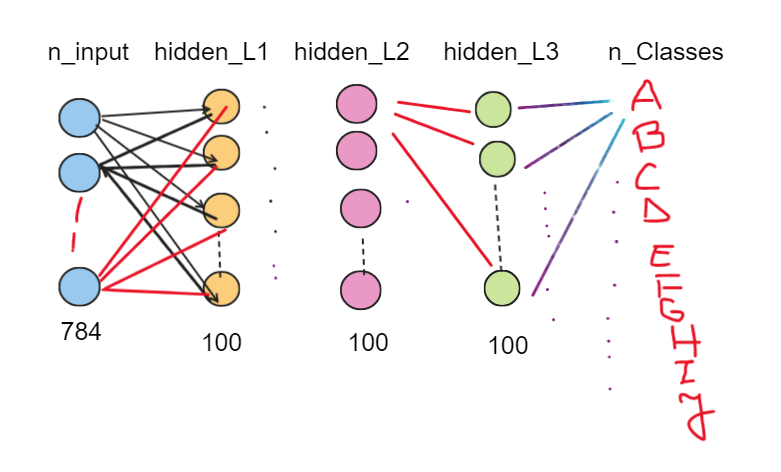

Cum alegem input?
> Se vor folosi dimensiunile imaginii W * H ==> nr pixeli= nr neuroni input (array input)



---
Cum alegem, interpretam output?
> avem 10 litere==> array de 10 valori, fiecare pozitie de 1, corespunde literii:

A: [1,0,0,0,0,0,0,0,0,0]

.
.

J: [1,0,0,0,0,0,0,0,0,0]




In [ ]:
n_input = 784

hidden_layer_neurons = 100

hidden_layer2_neurons = 100

hidden_layer3_neurons = 100

n_classes = 10

> sunt folosite 10 variabile (x, y w1, w2, w3, w4, b1, b2, b3, b4)

# Valori weight (w) si bias pentru layere
* acestea vor fi memorate in array-uri
* intre fiecare 2 layere se calculeaza w si bias, valorile fiind influientate de nr de neuroni din layere :)


---
Weights values:

* w1 ⋲ shape (n_inputs, hidden_layer_neurons)
-->shape=(784, 100)
* w2 ⋲ shape (hidden_layer_neurons, hidden_layer2_neurons)
* w3 ⋲ shape(hidden_layer2_neurons, hidden_layer3_neurons)
* w4 ⋲ shape(hidden_layer3_neurons, n_classes)
---
bias:
* b1 ==> un array de  **hidden_layer_neurons**  elemenete
* b2 ==> un array de  **hidden_layer2_neurons**  elemenete
* b3 ==> un array de  **hidden_layer3_neurons**  elemenete
* b4 ==> un array de  **n_classes**  elemenete
---





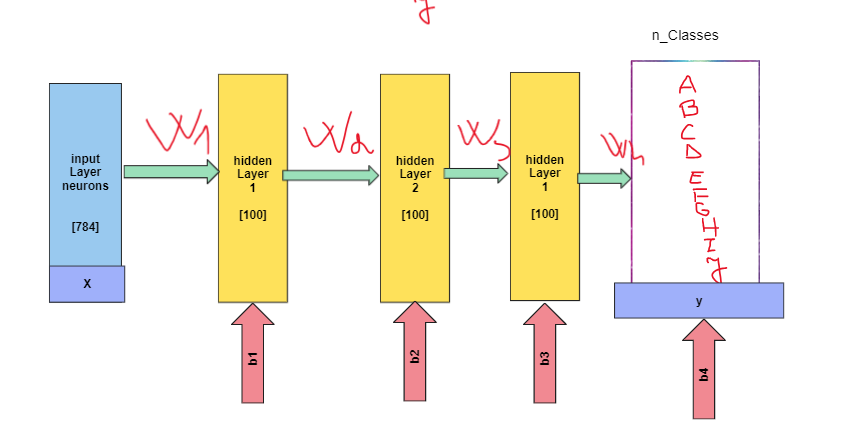

In [ ]:
# Implementare :)
# trebuie folosita aceasta functie, altfel, la rulari multiple--> eroare
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


# Placeholder in TensorFlow

* obiecte TensorFlow
* locuri de HRANIRE ALE GRAFULUI
* e un tip de nod in graf
* e pentru specificarea datelor de intrare

In [ ]:
x = tf.compat.v1.placeholder(tf.float32, shape=[None, n_input])
x

<tf.Tensor 'Placeholder:0' shape=(None, 784) dtype=float32>

In [ ]:
y = tf.compat.v1.placeholder(tf.float32, shape=[None, n_classes])
y

<tf.Tensor 'Placeholder_1:0' shape=(None, 10) dtype=float32>

# Weights values -  initializate cu valori random!!!!!!

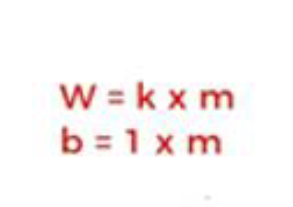
---
De ce se initializeaza variabilele?

R: pentru a incepe invatarea.



In [ ]:
w1 = tf.Variable(tf.random.normal([n_input, hidden_layer_neurons]))
print(f'w1: {w1}')
w2 = tf.Variable(tf.random.normal([hidden_layer_neurons, hidden_layer2_neurons]))
print(f'w2: {w2}')
w3 = tf.Variable(tf.random.normal([hidden_layer2_neurons, hidden_layer3_neurons]))
print(f'w3: {w3}')
w4 = tf.Variable(tf.random.normal([hidden_layer3_neurons, n_classes]))
print(f'w4: {w4}')


w1: <tf.Variable 'Variable:0' shape=(784, 100) dtype=float32>
w2: <tf.Variable 'Variable_1:0' shape=(100, 100) dtype=float32>
w3: <tf.Variable 'Variable_2:0' shape=(100, 100) dtype=float32>
w4: <tf.Variable 'Variable_3:0' shape=(100, 10) dtype=float32>


> # Bias values - initializate cu valori random!!!!!!
```
dimensiunea array-ului este determinata de layerele intre care se afla.
```



In [ ]:
b1 = tf.Variable(tf.random.normal([hidden_layer_neurons]))
# array de 100  linii
print(f'b1: {b1}')
b2 = tf.Variable(tf.random.normal([hidden_layer2_neurons]))
# array de 100  linii
print(f'b2: {b2}')
b3 = tf.Variable(tf.random.normal([hidden_layer3_neurons]))
# array de 100  linii
print(f'b3: {b3}')

print("****** output *********")
b4 = tf.Variable(tf.random.normal([n_classes]))
# array de 10  linii
print(f'b4: {b4}')

b1: <tf.Variable 'Variable_4:0' shape=(100,) dtype=float32>
b2: <tf.Variable 'Variable_5:0' shape=(100,) dtype=float32>
b3: <tf.Variable 'Variable_6:0' shape=(100,) dtype=float32>
****** output *********
b4: <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32>


> # Functii de activare(ReLU)

* se folosesc weight-urile si bias(informatiile din stratul anterior), rezultatul fiind utilizate in urmatorul layer.

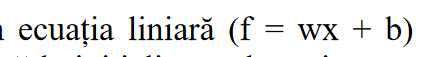


# Ce functii de folosesc:
1. Pentru toate layerele - ReLU
2. Pentru layer de output: sigmoid(cea mai buna pt clasificare)!!!!!
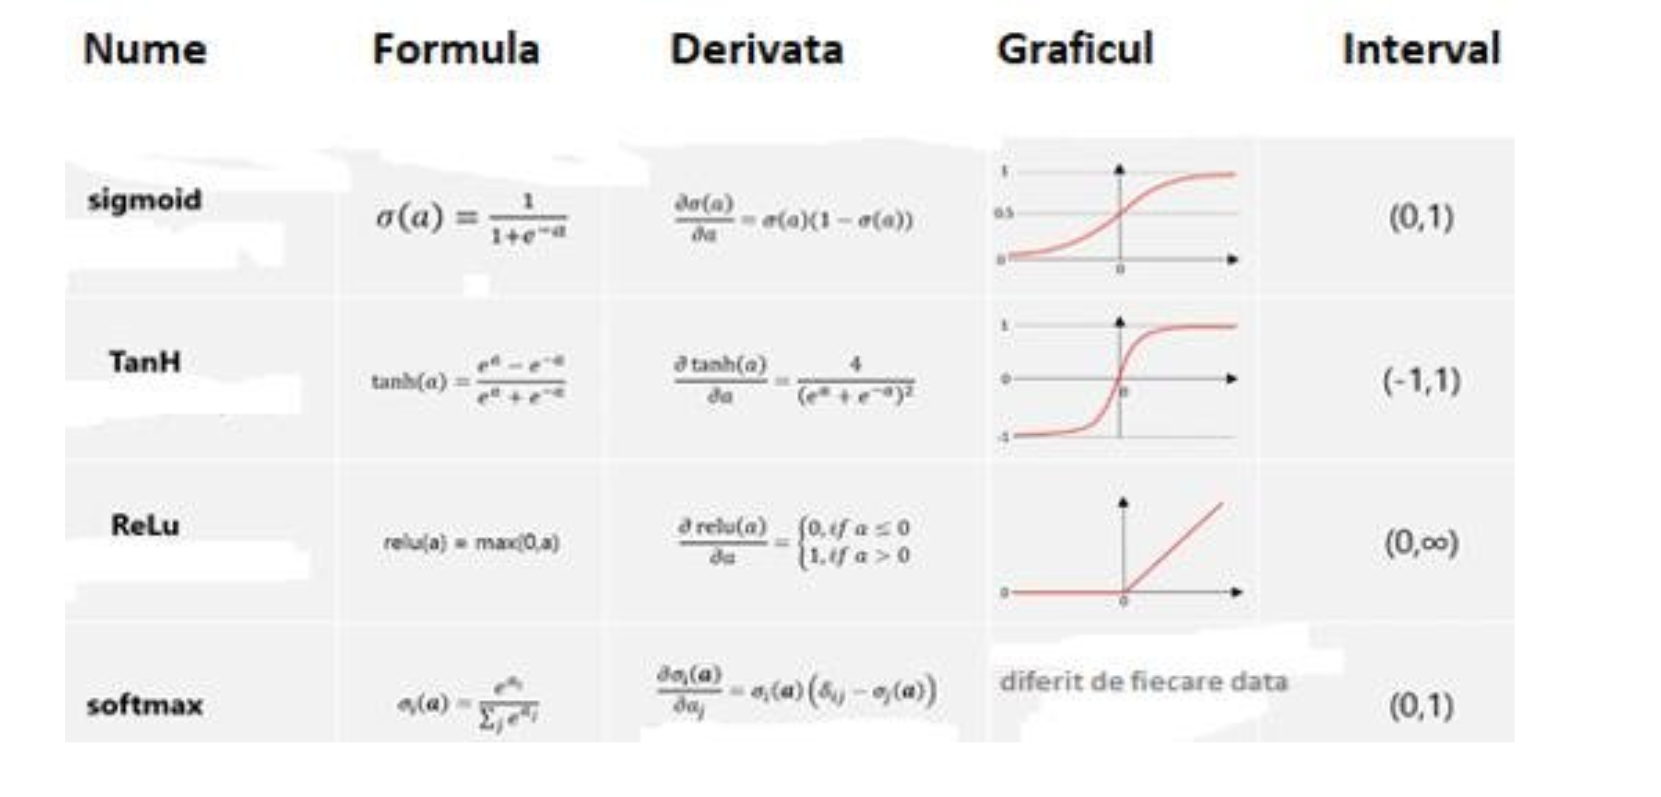

#  Softmax
* este folosit la layer-ul de final, pentru a genera output-uri cu suma probabilitatilor 1:

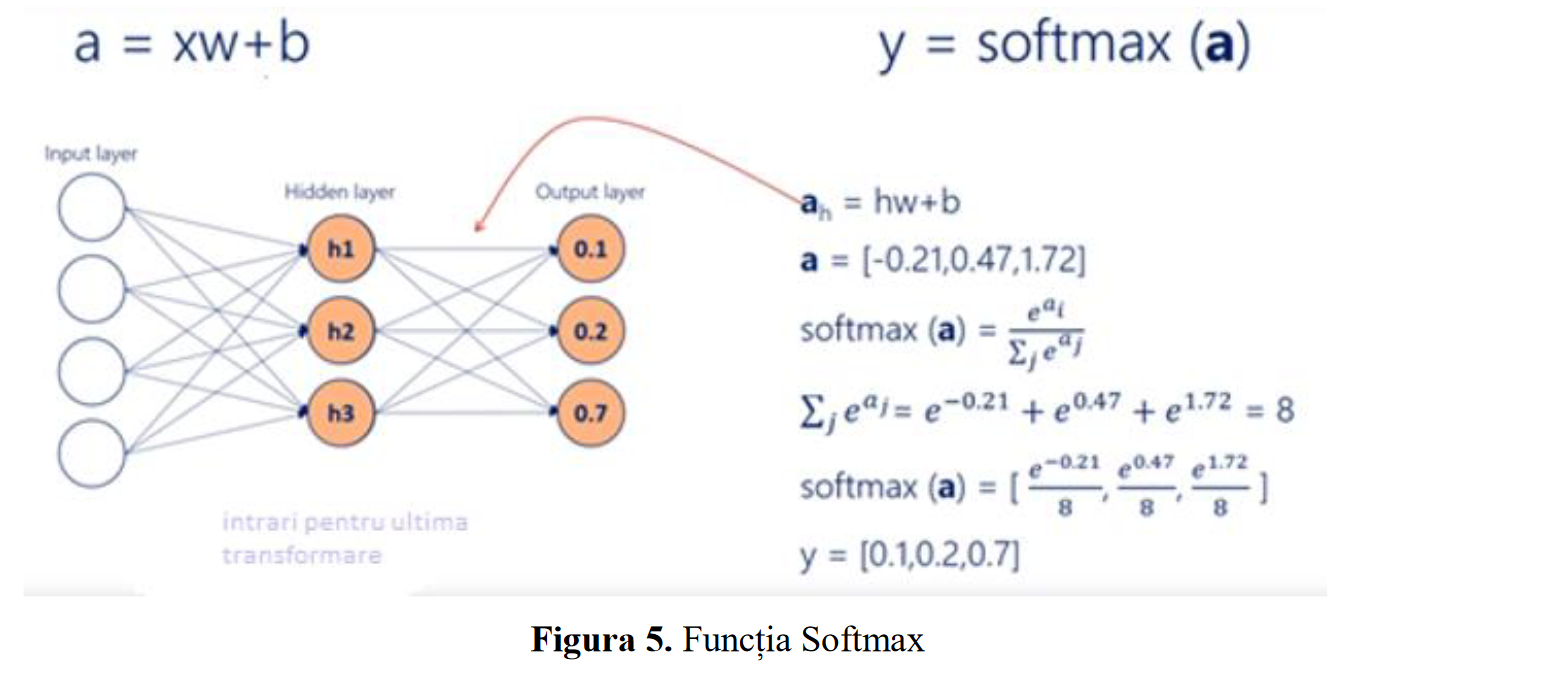

# Implementare:
## The multilayer perceptron model



---
se folosesc rezultatele din layer-ul anterior


---

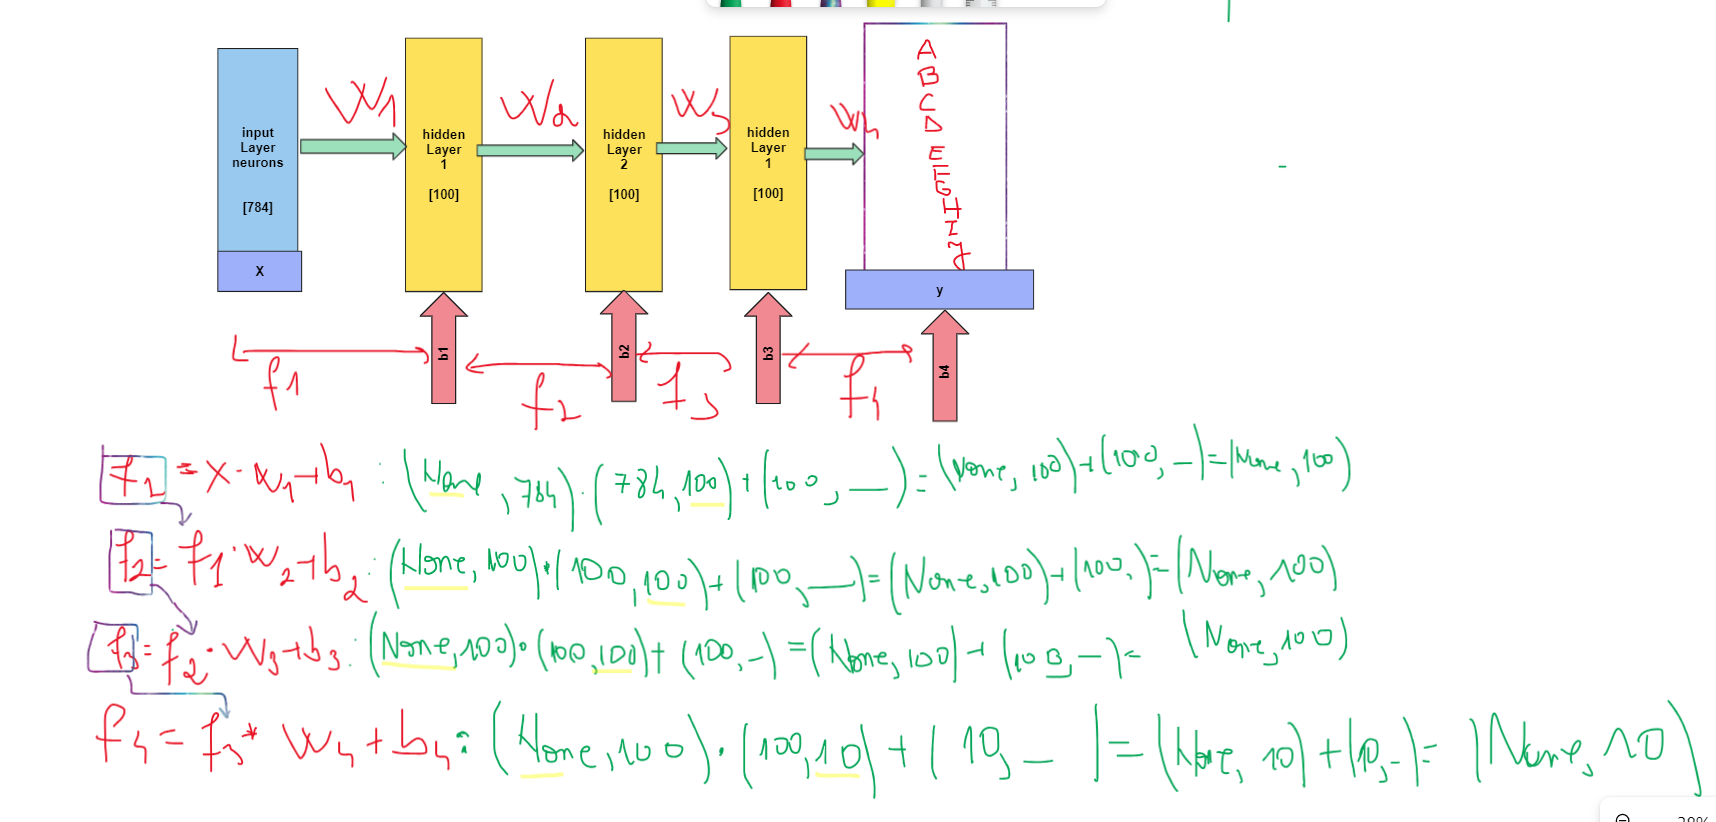


In [ ]:
# Calcule Hidden Layer 1:
hidden_layer = tf.nn.relu(tf.add(tf.matmul(x, w1), b1))
hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer, w2), b2))
hidden_layer3 = tf.nn.relu(tf.add(tf.matmul(hidden_layer2, w3), b3))
output_layer = tf.add(tf.matmul(hidden_layer3, w4), b4)

print("Hidden Layer 1")
print(hidden_layer)
print("Hidden Layer 2")
print(hidden_layer2)
print("Hidden Layer 3")
print(hidden_layer3)
print("Output layer")
print(output_layer)


Hidden Layer 1
Tensor("Relu:0", shape=(None, 100), dtype=float32)
Hidden Layer 2
Tensor("Relu_1:0", shape=(None, 100), dtype=float32)
Hidden Layer 3
Tensor("Relu_2:0", shape=(None, 100), dtype=float32)
Output layer
Tensor("Add_3:0", shape=(None, 10), dtype=float32)


# Cost function:
* pe layer-ul de output nu se folosesc functii de activare
* pe ultimul strat se calculeaza loss-ul:
tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)
* costul este valoarea care indică cât de greșită este predicția modelului, iar zero reprezintă predicția perfectă

---

# Regularizare
* calculeaza loss-urile pentru a adapta w-urile
* Scop: reduce overfitting-ul

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
print(f'Cost: {cost}')
regularizers = tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2)+tf.nn.l2_loss(w3) + tf.nn.l2_loss(w4)
print(f'regularizers: {regularizers}')
cost = tf.reduce_mean(cost + 1*regularizers)
print(f'Cost: {cost}')


Cost: Tensor("Mean:0", shape=(), dtype=float32)
regularizers: Tensor("add_6:0", shape=(), dtype=float32)
Cost: Tensor("Mean_1:0", shape=(), dtype=float32)


# Parametri de invatare


In [ ]:

# training parameters
learning_rate = 0.02
epochs = 5
batch_size = 300
nrBatches = 300*10//batch_size

# Optimizator
* reteaua "invata sa prezica"
* minimizeaza cost-ul


---


* daca NU impartim datele ==> folosim optimizatorul "Gradient descent"
* daca impartim datele in batch-uri ==>putem folosi optimizatorul "Adam"

# **Optimizator Adam**
> optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(mean_loss)

* learning_rate=0.001 ==> un hiperparametru, pe care-l modificam pt a invata
* are implementat deja algoritmul de detectare a loss-urilor minime!!!!!!!


In [ ]:
trainer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
# Define the Test model and accuracy
#argmax: vector cu pozitiilr pe care s-a obtinut probabitatea cea mai mare(clasofocarea buna
#tf.equal: va genera un vecor de 0 si 1. daca in realitate e ok si prezis corecct =1, altfel 0
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))

# reduce_mean = aplica functia de acuratete:
# ex: [1  0 1 1]=> mean = (1+0+1+1)/4
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
accuracy

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

# Backpropagation:
* Se face back, calculandu-se loss-ul, fiind penalizat prin functia de cost.
* Se inceraca ca aceasta valoare sa aiba val. min


---
# Oprire Prematură (early stopping):
* la fiecare epoca, se adapteaza ponderele (w-urile), in cazul in care se observa ca rezultatele generate nu sunt conforme, se va opri inainte ca numarul de iteratii(epoci) sa se fi terminat.

* Rol: evitare overfitting (suprainvatare)

* Cand: atunci ccand in invatarea: Gradient descrnd, deplasarea pe curbele de LOSS, in loc sa se gaseasca valori mai mici, acestea incep sa creasca

# Epoci si batch-uri

* int-o epoca, se vor procesa batch-urile care formeaza setul de date
* Există 2 bucle de procesare a datelor: o buclă mare pentru procesarea pe toate cele 15 epoci, buclă care înglobează o buclă mică pentru procesarea tuturor sub-seturilor de date.

# Antrenare
* pentru antrenare se folosesc grafuri computetionle.
* dupa fiecare epoca valorile trebuie reinitializate pentru a invata de la 0, de fiecare data.
* in versiunile mai vehi era nevoie sa se resetez manual graful printr-o functie, d la versiunea 2.0 nu mai este nevoie!!

## In implementare:

* se vor parcurge imaginile, in batch-uri, rezultand 2 vectori, unul cu labels, iar celalalt features.
* Se parcurge intreg setul de date, dar in batch-uri!!!!!!!



# Observatie:

cand se  adauga noile info:

 -->label: array cu 1 pe pozitia literei

 -->features: array de 784 pozitii,  cu datele redimensionate

# ***Preluare date pentru Antrenament***

# *********** preluarea caracteristicilor setului de date- pentru TEST ********************

# OneHot:
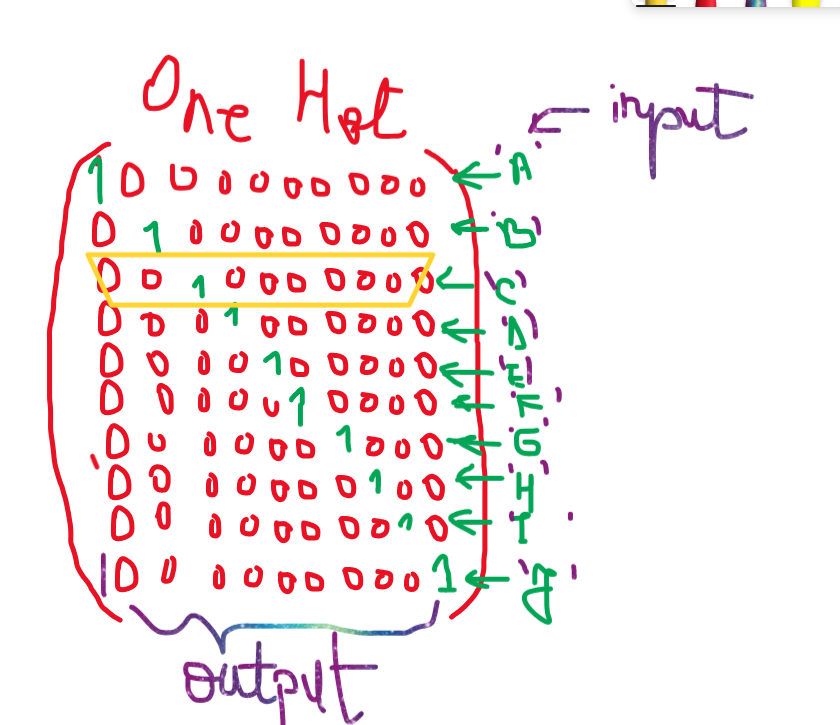

In [7]:
# preiau codurile Ascii:
val1 = ord('B')
val2= ord('A')
print(val1-val2)

2


In [10]:
import numpy as np
def getOneHot(alphabet):
    matrice = np.eye(10, dtype=np.float32)
    return np.eye(10, dtype=np.float32)[ord(alphabet) - ord('A')]



In [ ]:

    # se vor genera vectori in care sa se tina pixelii unei imagini introduse: 784 elemnetr
    dataset = np.ndarray(shape=(0, 784), dtype=np.float32)
    # etichete vor fi 10, pentru fiecare litera -> fiind o combinatie cu 1 pe pozitia literei, in rest, 9 pozitii cu 0
    labels = np.ndarray(shape=(0, 10), dtype=np.float32)
    with tf.compat.v1.Session() as sess:
        for i in range(0, len(testImages)):
            pathToImage = testLabels[i]+'/'+testImages[i]
            #print(pathToImage) : ./lettersTest/ERnJlZWRvbSBFeHRlbmRlZCBJdGFsaWMudHRm.png
            lastIndexOfSlash = pathToImage.rfind("/")
            folder = pathToImage[lastIndexOfSlash - 1]


            #prelucare imagine:
            #pas1: citesc imagine de la path:

            imageContents = tf.io.read_file(str(pathToImage))

            #pas2: decodificarea in png:
            image = tf.image.decode_png(imageContents, dtype=tf.uint8)

            #pas3: redimensionam imaginea: (in cazul in care sunt de dimensiuni diferite,sa devina toate identice)
            resized_image = tf.image.resize(image, [28, 28])

            imarray = resized_image.eval()
            imarray = imarray.reshape(784)

            appendingImageArray = np.array([imarray], dtype=np.float32)
            appendingNumberLabel = np.array([getOneHot(folder)], dtype=np.float32)
            labels = np.append(labels, appendingNumberLabel, axis=0)
            dataset = np.append(dataset, appendingImageArray, axis=0)



    print(f'Elementele  din setul de date: {dataset}')
    print(f'Etichetele din setul de date: {labels}')



In [11]:
getOneHot('A')

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
getOneHot('D')

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Invatarea-epoci

*  References:


---


1. https://github.com/ArdeleanRichard/University-Projects/tree/main/Python/MachineLearning/LetterRecognition


---



2. https://www.researchgate.net/publication/337738921_Recunoasterea_unei_cifre_scrise_de_mana_folosind_o_retea_neuronala_convolutionala_si_biblioteca_TensorFlow/figures?lo=1



---


3. https://nbviewer.org/github/greydanus/scribe/blob/master/sample.ipynb

4. https://greydanus.github.io/2016/08/21/handwriting/

5. https://colah.github.io/posts/2015-08-Understanding-LSTMs/

6. https://ion-mosnoi.medium.com/handwritting-recognition-using-tensorflow-aaf84fa9c587

7. [e.g] https://github.com/johnsmithm/handwritten-tf-1.0/blob/master/inference%20example.ipynb
8. [data set]  https://www.kaggle.com/datasets/lubaroli/notmnist?resource=download

8. https://ojs.aaai.org/index.php/AAAI/article/view/17136/16943





